In [26]:
import pandas as pd 
import numpy as np

#### Datensatz einlesen

Der folgende Datensatz enthält verschiedene Features zur Vorhersage, ob ein Patient an einer Herzerkrankung erkrankt ist  (target=0) oder gesunde ist (target=1).

In [27]:
df = pd.read_csv('heart.csv')

In [28]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Aufgabe 1

#### a) Analyse der Zielvariable

Untersuchen Sie die Verteilung der Zielvariablen 'target'.

In [29]:
print(f"{df['target'].where(df['target'] == 1).count()} samples ohne Herzerkrankung")
print(f"{df['target'].where(df['target'] == 0).count()} samples mit Herzerkrankung")

165 samples ohne Herzerkrankung
138 samples mit Herzerkrankung


#### b)  Visualisierung der Altersverteilung

Zeichnen Sie ein Histogramm der Altersverteilung. Zeichnen Sie anschließend Histogramme der Altersverteilung derjenigen Patienten mit 'target=0' (herzkrank) und 'target=1' (gesund). Verwenden Sie dazu die Funktion <a href="https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html">matplotlib.pyplot.hist<a/>.

Text(0, 0.5, 'Anzahl der Patienten')

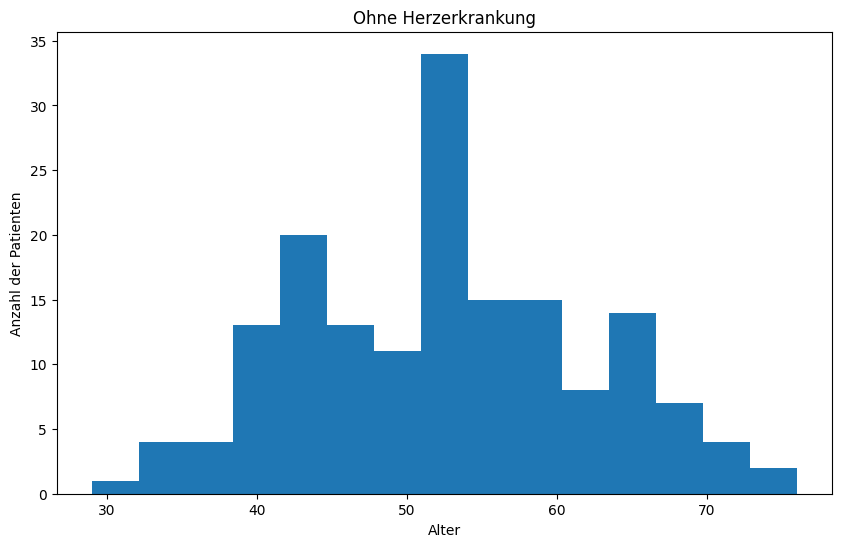

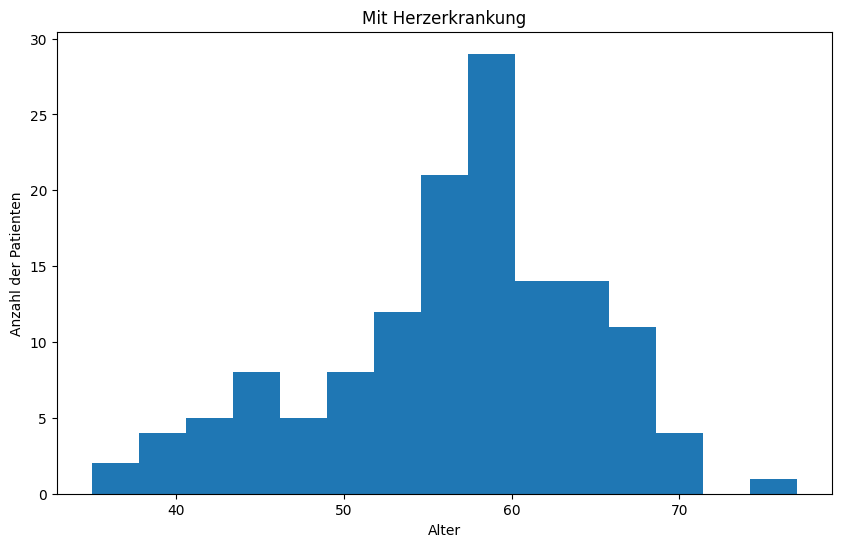

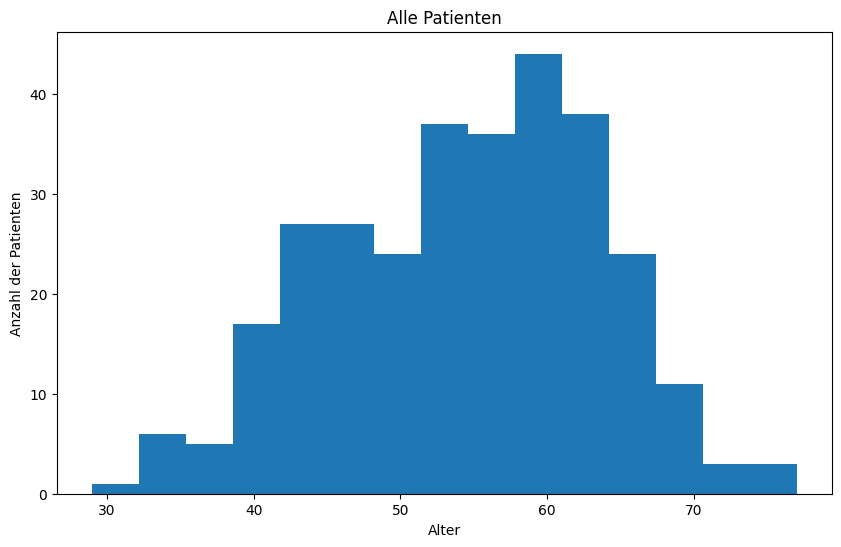

In [30]:
import matplotlib.pyplot as plt



plt.figure(figsize=(10,6))
plt.hist(df['age'].where(df['target'] == 1), bins=15)
plt.title('Ohne Herzerkrankung')
plt.xlabel('Alter')
plt.ylabel('Anzahl der Patienten')

plt.figure(figsize=(10,6))
plt.hist(df['age'].where(df['target'] == 0), bins=15)
plt.title('Mit Herzerkrankung')
plt.xlabel('Alter')
plt.ylabel('Anzahl der Patienten')

plt.figure(figsize=(10,6))
plt.hist(df['age'], bins=15)
plt.title('Alle Patienten')
plt.xlabel('Alter')
plt.ylabel('Anzahl der Patienten')

#### c) Datenvorbereitung

Spalten Sie die Zielvariable **target** ab und splitten Sie die Daten anschließend in einen Trainings- und einen Testdatensatz auf (20% Test, 80% Train).

In [31]:
from sklearn.model_selection import train_test_split
y = df.iloc[:,-1]
X = df.drop(df.columns[-1], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### d) Training eines RandomForest

Trainieren Sie einen <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html">RandomForestClassifier</a> in Scikit-learn mit den Parametern **n_estimators=20**, **max_depth=1** und **min_samples_leaf = 2**. 

Hinweis: es wird in dieser Übung darauf verzichtet, die Hyperparameter zu optimieren. Grundsätzlich wäre dies jedoch sinnvoll.

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve

random_forst = RandomForestClassifier(n_estimators=20, max_depth=1, min_samples_leaf=2)

random_forst.fit(X_train, y_train)

RandomForestClassifier(max_depth=1, min_samples_leaf=2, n_estimators=20)

#### e) Modellvalidierung

Bestimmen Sie jeweils den ROC-AUC-Score und die Accuracy auf dem Trainings- und auf dem Testdatensatz. Wie bewerten Sie die Güte des Modells?

ROC score training: 0.9221563082016969
ROC score test: 0.9342672413793105


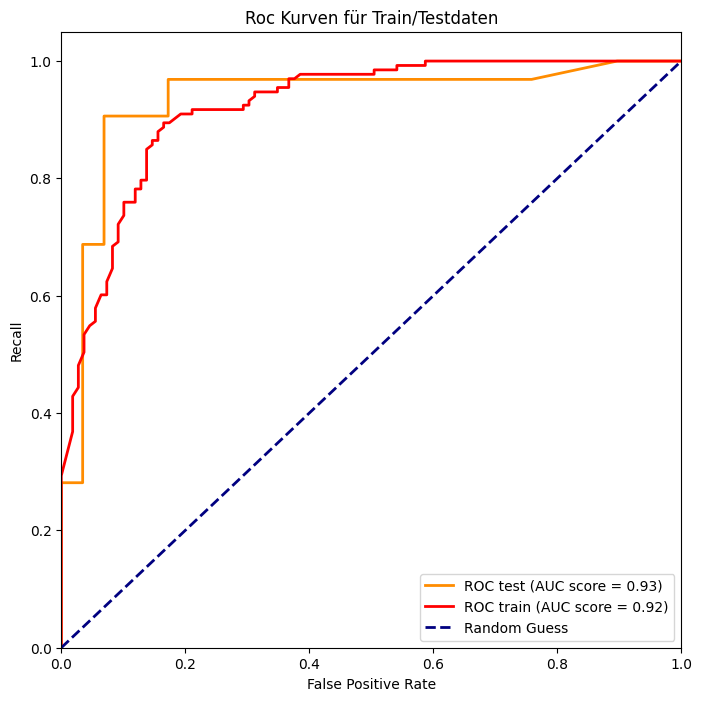

In [33]:

proba_train = random_forst.predict_proba(X_train)[:,1]
proba_test = random_forst.predict_proba(X_test)[:,1]

roc_train = roc_auc_score(y_train, proba_train)
roc_test = roc_auc_score(y_test, proba_test)

print("ROC score training: {}".format(roc_train))
print("ROC score test: {}".format(roc_test))

fpr_test, tpr_test, threshold_test = roc_curve(y_test, proba_test)
fpr_train, tpr_train, threshold_train = roc_curve(y_train, proba_train)

plt.figure(figsize=(8, 8))

plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'ROC test (AUC score = {roc_test:.2f})')
plt.plot(fpr_train, tpr_train, color='red', lw=2, label=f'ROC train (AUC score = {roc_train:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('Roc Kurven für Train/Testdaten')
plt.legend(loc="lower right")

plt.show()

#### f) Feature-Importances

Bestimmen Sie die Feature-Importances für alle Features. Welche fünf Features haben die höchste Feature-Importance?



In [34]:
feature_importances = random_forst.feature_importances_

top5_feature_indices = np.argsort(feature_importances)[::-1][:5]

# Namen der Features (angenommen, Sie haben Feature-Namen)
feature_names = [f"Feature_{i}" for i in range(X.shape[1])]

# Die fünf Features mit der höchsten Importance ausgeben
top5_features = [feature_names[i] for i in top5_feature_indices]
print("Die fünf Features mit der höchsten Importance:")
for feature in top5_features:
    print(feature)

Die fünf Features mit der höchsten Importance:
Feature_2
Feature_12
Feature_11
Feature_9
Feature_8


#### g) Training eines Decision Trees

Trainieren Sie nun einen Decision Tree mit den Parametern **max_depth=1** und **min_samples_leaf = 2**. Berechnen Sie erneut die Accuracy und den ROC_AUC_SCORE jeweils für Train und Test. Vergleichen Sie die Ergebnisse mit den Ergebnissen des RandomForest.

Accuracy auf Trainingsdaten: 0.7396694214876033
Accuracy auf Testdaten: 0.8360655737704918
ROC score training: 0.7374974132579154
ROC score test: 0.8389008620689655


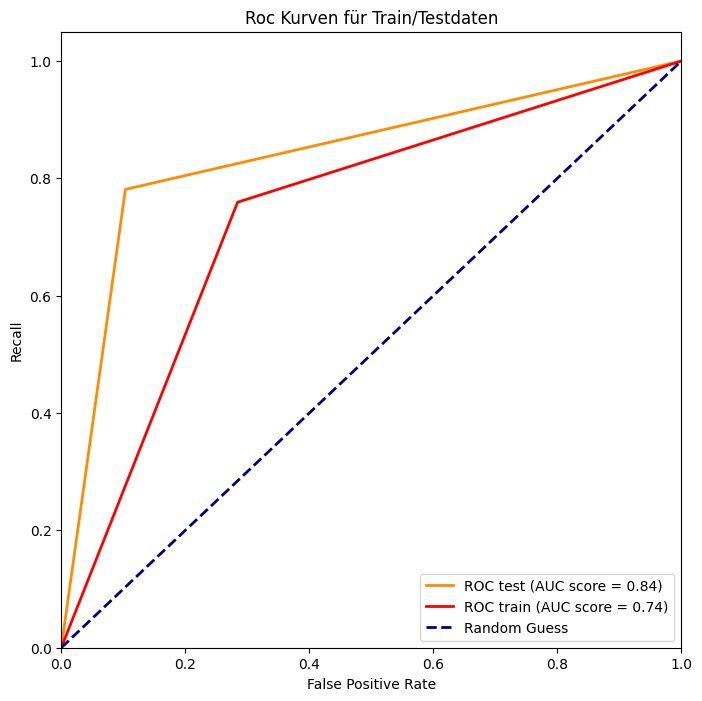

In [36]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(min_samples_leaf=2,max_depth=1)
decision_tree.fit(X_train, y_train)

print(f"Accuracy auf Trainingsdaten: {decision_tree.score(X_train, y_train)}")
print(f"Accuracy auf Testdaten: {decision_tree.score(X_test, y_test)}")
proba_train = decision_tree.predict_proba(X_train)[:,1]
proba_test = decision_tree.predict_proba(X_test)[:,1]

roc_train = roc_auc_score(y_train, proba_train)
roc_test = roc_auc_score(y_test, proba_test)

print("ROC score training: {}".format(roc_train))
print("ROC score test: {}".format(roc_test))

fpr_test, tpr_test, threshold_test = roc_curve(y_test, proba_test)
fpr_train, tpr_train, threshold_train = roc_curve(y_train, proba_train)

plt.figure(figsize=(8, 8))

plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'ROC test (AUC score = {roc_test:.2f})')
plt.plot(fpr_train, tpr_train, color='red', lw=2, label=f'ROC train (AUC score = {roc_train:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('Roc Kurven für Train/Testdaten')
plt.legend(loc="lower right")

plt.show()


## Aufgabe 2

In dieser Aufgabe soll für den obigen Datensatz ein Klassifikationsmodell basierend auf einem Support Vetor Classifier entwickelt werden.

#### a) Training eines Support Vector Classifiers

Trainieren Sie nun einen Support Vector Classifier in Scikit-learn unter Verwendung des Gauß-Kernels (kernel='rbf'). Bestimmen Sie anschließend die Accuracy auf dem Trainings- und auf dem Testdatensatz und vergleichen Sie diese mit den Ergebnissen des RandomForest. Wie erklären Sie Ihre Beobachtung?

In [38]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)

print(f"Accuracy auf Trainingsdaten: {svc.score(X_train, y_train)}")
print(f"Accuracy auf Testdaten: {svc.score(X_test, y_test)}")

Accuracy auf Trainingsdaten: 0.6570247933884298
Accuracy auf Testdaten: 0.7049180327868853


#### b) SVC mit Standardisierung

Wiederholen Sie Teilaufgabe a), aber wenden Sie vorher einen StandardScaler an. Wie erklären Sie Ihre Beobachtung?

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

svc_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf'))
])

svc_pipe = svc_pipeline
svc_pipe.fit(X_train, y_train)

print(f"Accuracy auf Trainingsdaten: {svc_pipe.score(X_train, y_train)}")
print(f"Accuracy auf Testdaten: {svc_pipe.score(X_test, y_test)}")

Accuracy auf Trainingsdaten: 0.9214876033057852
Accuracy auf Testdaten: 0.8688524590163934


#### c) Hyperparameteroptimierung

Optimieren Sie nun die Hyperparameter C und gamma des Support Vector Classifiers. Legen Sie dazu eine Pipeline bestehend aus einem StandardScaler und einem Support Vector Classifier an und verwenden Sie diese innerhalb einer GridSearch mit fünffacher Cross Validation. Testen Sie für den Parameter C die Werte 0.01, 0.1, 1 und 10 und für den Parameter gamma die Werte 0.001, 0.01, 0.1, 1 und 10.

In [41]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "svm__C": [0.01,0.1,1,10],
    "svm__gamma": [0.001,0.01,0.1,1,10]
}

grid_search = GridSearchCV(svc_pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC())]),
             param_grid={'svm__C': [0.01, 0.1, 1, 10],
                         'svm__gamma': [0.001, 0.01, 0.1, 1, 10]})

#### d) Modellbewertung

Vergleichen Sie das Modell, das sich aus den optimalen Parametern ergibt mit dem RandomForest, indem Sie wieder die Accuracy auf den Trainingsdaten und auf den Testdaten berechnen. Wie lautet Ihr Fazit?

In [42]:
print(f"Accuracy auf Trainingsdaten: {grid_search.score(X_train, y_train)}")
print(f"Accuracy auf Testdaten: {grid_search.score(X_test, y_test)}")

Accuracy auf Trainingsdaten: 0.8925619834710744
Accuracy auf Testdaten: 0.8524590163934426


Standard Scaler mit Support Vector Classifier is OP